<a href="https://colab.research.google.com/github/RajdeepT/ML_assignment/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final theta values: [0.99613347 0.00133954]
Final cost function value: 1.3131948455078304e-06


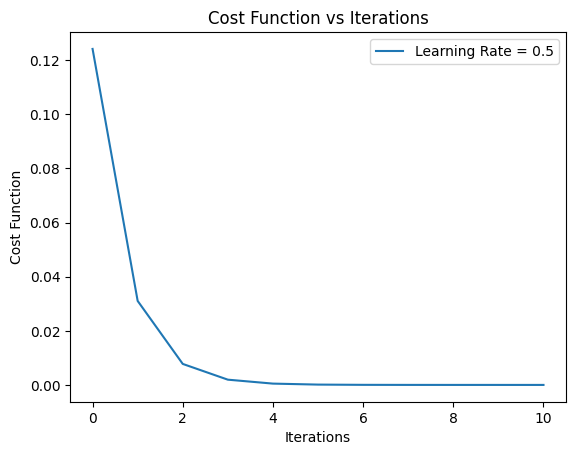

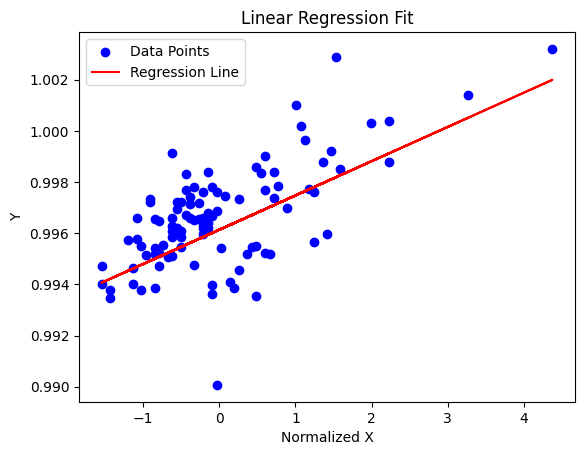

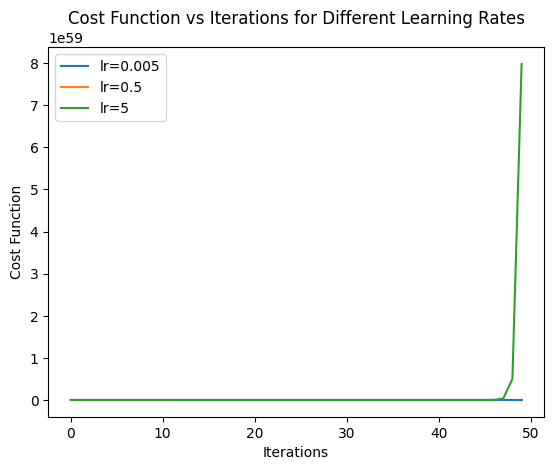

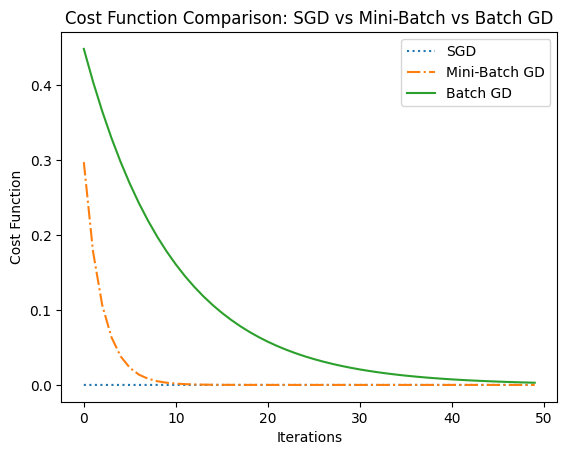

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets from Google Drive
url_X = "https://drive.google.com/uc?id=1WQYnu2khIL9s6vd9uNzBxwB84ekeBksR"
url_Y = "https://drive.google.com/uc?id=1OtOm6mFfK_WW07QcP_XuL6pbA952jxVH"

X = pd.read_csv(url_X, header=None).values
Y = pd.read_csv(url_Y, header=None).values

# Normalize X (feature scaling)
X = (X - np.mean(X)) / np.std(X)

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
def initialize_theta(n):
    return np.zeros((n, 1))

# Cost function
def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X.dot(theta)
    return (1 / (2 * m)) * np.sum((predictions - Y) ** 2)

# Batch Gradient Descent
def gradient_descent(X, Y, theta, lr, num_iters, convergence_threshold=1e-6):
    m = len(Y)
    cost_history = []
    for i in range(num_iters):
        gradient = (1 / m) * X.T.dot(X.dot(theta) - Y)
        theta -= lr * gradient
        cost = compute_cost(X, Y, theta)
        cost_history.append(cost)
        if i > 0 and abs(cost_history[-2] - cost) < convergence_threshold:
            break  # Convergence criterion
    return theta, cost_history

# Train model with lr=0.5 and find final cost
theta = initialize_theta(X.shape[1])
theta, cost_history = gradient_descent(X, Y, theta, lr=0.5, num_iters=1000)
final_cost = cost_history[-1]
print("Final theta values:", theta.ravel())
print("Final cost function value:", final_cost)

# Plot Cost Function vs Iterations
plt.figure()
plt.plot(range(len(cost_history[:50])), cost_history[:50], label="Learning Rate = 0.5")
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Iterations")
plt.legend()
plt.show()

# Plot Data and Regression Line
plt.figure()
plt.scatter(X[:, 1], Y, color='blue', label="Data Points")
plt.plot(X[:, 1], X.dot(theta), color='red', label="Regression Line")
plt.xlabel("Normalized X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

# Test different learning rates
learning_rates = [0.005, 0.5, 5]
plt.figure()
for lr in learning_rates:
    theta = initialize_theta(X.shape[1])
    _, cost_hist = gradient_descent(X, Y, theta, lr, num_iters=50)
    plt.plot(range(len(cost_hist)), cost_hist, label=f"lr={lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function vs Iterations for Different Learning Rates")
plt.legend()
plt.show()

# Implement Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, Y, theta, lr, num_iters):
    m = len(Y)
    cost_history = []
    for i in range(num_iters):
        for j in range(m):
            rand_index = np.random.randint(0, m)
            xi = X[rand_index, :].reshape(1, -1)
            yi = Y[rand_index].reshape(1, -1)
            gradient = xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradient
        cost_history.append(compute_cost(X, Y, theta))
    return theta, cost_history

# Implement Mini-Batch Gradient Descent
def mini_batch_gradient_descent(X, Y, theta, lr, num_iters, batch_size=10):
    m = len(Y)
    cost_history = []
    for i in range(num_iters):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]
        for j in range(0, m, batch_size):
            X_mini = X_shuffled[j:j+batch_size]
            Y_mini = Y_shuffled[j:j+batch_size]
            gradient = (1 / batch_size) * X_mini.T.dot(X_mini.dot(theta) - Y_mini)
            theta -= lr * gradient
        cost_history.append(compute_cost(X, Y, theta))
    return theta, cost_history

# Choose suitable learning rate
lr = 0.05

# Train using SGD
theta_sgd = initialize_theta(X.shape[1])
theta_sgd, cost_sgd = stochastic_gradient_descent(X, Y, theta_sgd, lr, num_iters=50)

# Train using Mini-Batch GD
theta_mbgd = initialize_theta(X.shape[1])
theta_mbgd, cost_mbgd = mini_batch_gradient_descent(X, Y, theta_mbgd, lr, num_iters=50, batch_size=20)

# Train using Batch GD for comparison
theta_bgd = initialize_theta(X.shape[1])
theta_bgd, cost_bgd = gradient_descent(X, Y, theta_bgd, lr, num_iters=50)

# Plot Cost Function vs Iterations for Different Methods
plt.figure()
plt.plot(range(50), cost_sgd, label="SGD", linestyle='dotted')
plt.plot(range(50), cost_mbgd, label="Mini-Batch GD", linestyle='dashdot')
plt.plot(range(50), cost_bgd, label="Batch GD", linestyle='solid')
plt.xlabel("Iterations")
plt.ylabel("Cost Function")
plt.title("Cost Function Comparison: SGD vs Mini-Batch vs Batch GD")
plt.legend()
plt.show()